In [ ]:
%config Completer.use_jedi = False
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50
from keras_preprocessing.image import load_img
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Btech Project

/content/drive/My Drive/Btech Project


In [ ]:
traindir = "./lung cancer/train"
testdir = "./lung cancer/test"

In [ ]:
uniq_labels = sorted(os.listdir(traindir))

In [ ]:
def load_data(trainDir,uniqueLabels, size):
    images = []
    labels = []
    #size = 32,32
    for idx, label in enumerate(uniqueLabels):
        for file in os.listdir(trainDir  +"/" + label):
          filepath = trainDir + "/" + label + "/" + file
          image = cv2.resize(cv2.imread(filepath), size)
          images.append(image)
          labels.append(idx)
        print(label)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
images, labels = load_data(traindir,uniq_labels, (64,64))


Bengin cases
Malignant cases
Normal cases


In [ ]:
X_test, y_test = load_data(testdir,uniq_labels,(64,64))

Bengin cases
Malignant cases
Normal cases


In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(images, labels, test_size = 0.3, stratify = labels)

In [ ]:
train_n = len(X_train)
test_n = len(X_test)
eval_n = len(X_eval)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)


print("Number of evaluation images: ", eval_n)

Number of training images:  1619
Number of testing images:  30
Number of evaluation images:  695


In [ ]:
X_train.shape

(1619, 64, 64, 3)

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)
y_eval = tensorflow.keras.utils.to_categorical(y_eval)
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [ ]:
def results(model,history, x_test, y_test):
  #rmsProp = tensorflow.keras.optimizers.RMSprop()

  #model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

  #history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  

  #model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  test_loss, test_acc = model.evaluate( x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

In [ ]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True) 
val_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8) 
val_generator = val_datagen.flow(X_eval, y_eval, batch_size=8)

ALEXNET


In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='softmax')  
    
    
])

In [ ]:
model.compile(optimizer = "adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs =20, batch_size = 32, validation_data = (X_eval, y_eval))

Epoch 1/20
51/51 [==============================] - 17s 332ms/step - loss: 0.0994 - accuracy: 0.9704 - val_loss: 3.7726 - val_accuracy: 0.4576
Epoch 2/20
51/51 [==============================] - 17s 331ms/step - loss: 0.0846 - accuracy: 0.9747 - val_loss: 2.9836 - val_accuracy: 0.5957
Epoch 3/20
51/51 [==============================] - 17s 329ms/step - loss: 0.0555 - accuracy: 0.9852 - val_loss: 2.1124 - val_accuracy: 0.5022
Epoch 4/20
51/51 [==============================] - 17s 327ms/step - loss: 0.0470 - accuracy: 0.9858 - val_loss: 3.9239 - val_accuracy: 0.5309
Epoch 5/20
51/51 [==============================] - 18s 363ms/step - loss: 0.0388 - accuracy: 0.9858 - val_loss: 14.4914 - val_accuracy: 0.4849
Epoch 6/20
51/51 [==============================] - 17s 330ms/step - loss: 0.1012 - accuracy: 0.9710 - val_loss: 0.3426 - val_accuracy: 0.9050
Epoch 7/20
51/51 [==============================] - 17s 329ms/step - loss: 0.0400 - accuracy: 0.9914 - val_loss: 0.7576 - val_accuracy: 0.779

In [ ]:
model.save('AlexNet.h5')

In [ ]:
history_all = {}
# Save history    
if len(history_all) == 0:
    history_all = {key: [] for key in history.history}

for key in history_all:
    history_all[key].extend(history.history[key])

In [ ]:
def show_train_history(history, xlabel, ylabel, train, title):
    for item in train:
        plt.plot(history[item])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(train, loc='upper left')
    plt.show()

In [ ]:
model.metrics_names

['loss', 'accuracy']

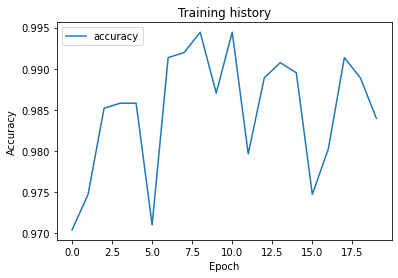

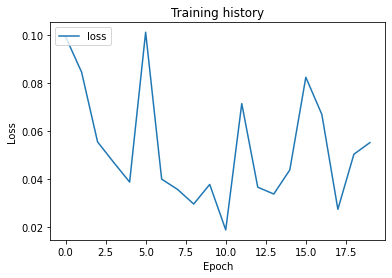

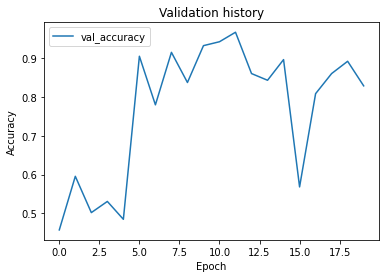

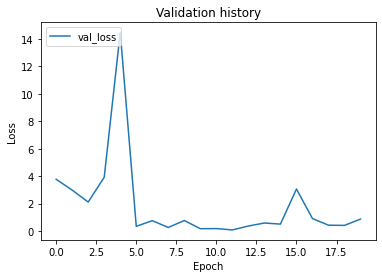

In [ ]:
show_train_history(history_all, 'Epoch', 'Accuracy', ('accuracy',), 'Training history')
show_train_history(history_all, 'Epoch', 'Loss', ('loss',), 'Training history')
show_train_history(history_all, 'Epoch', 'Accuracy', ('val_accuracy',), 'Validation history')
show_train_history(history_all, 'Epoch', 'Loss', ('val_loss',), 'Validation history')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_10 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_11 (Bat  (None, 7, 7, 256)        1024      
 chNormalization)                                                
                                                      

1/1 [==============================] - 0s 72ms/step - loss: 1.8910 - accuracy: 0.7000
Test accuracy: 0.699999988079071
Test loss: 1.89101243019104


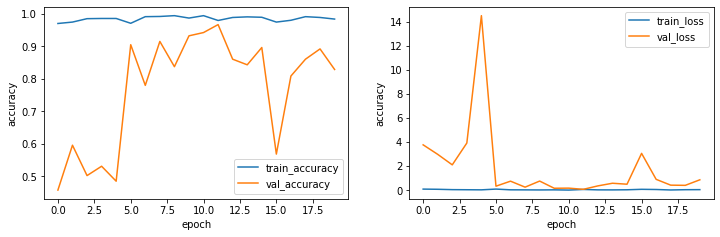

In [ ]:
results(model,history, X_test, y_test)

IF WE USE THE AUGMENTATED DATA

In [ ]:
history = model.fit_generator(train_generator, epochs=10,validation_data=val_generator)

Epoch 1/10
  1/203 [..............................] - ETA: 21s - loss: 0.0029 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


203/203 [==============================] - 21s 105ms/step - loss: 0.1301 - accuracy: 0.9648 - val_loss: 1.5681 - val_accuracy: 0.6950
Epoch 2/10
203/203 [==============================] - 21s 105ms/step - loss: 0.1255 - accuracy: 0.9704 - val_loss: 0.0738 - val_accuracy: 0.9683
Epoch 3/10
203/203 [==============================] - 21s 105ms/step - loss: 0.1319 - accuracy: 0.9642 - val_loss: 1.4541 - val_accuracy: 0.7353
Epoch 4/10
203/203 [==============================] - 21s 105ms/step - loss: 0.0681 - accuracy: 0.9846 - val_loss: 0.1023 - val_accuracy: 0.9655
Epoch 5/10
203/203 [==============================] - 21s 106ms/step - loss: 0.1576 - accuracy: 0.9568 - val_loss: 0.4265 - val_accuracy: 0.7885
Epoch 6/10
203/203 [==============================] - 23s 114ms/step - loss: 0.0962 - accuracy: 0.9734 - val_loss: 0.0952 - val_accuracy: 0.9655
Epoch 7/10
203/203 [==============================] - 21s 106ms/step - loss: 0.1082 - accuracy: 0.9685 - val_loss: 0.3282 - val_accuracy: 0.9

1/1 [==============================] - 0s 74ms/step - loss: 0.1126 - accuracy: 0.9667
Test accuracy: 0.9666666388511658
Test loss: 0.11262353509664536


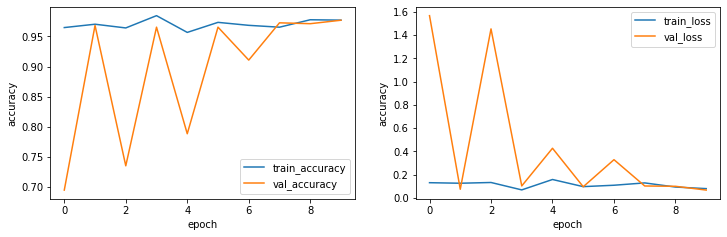

In [ ]:
results(model,history, X_test, y_test)

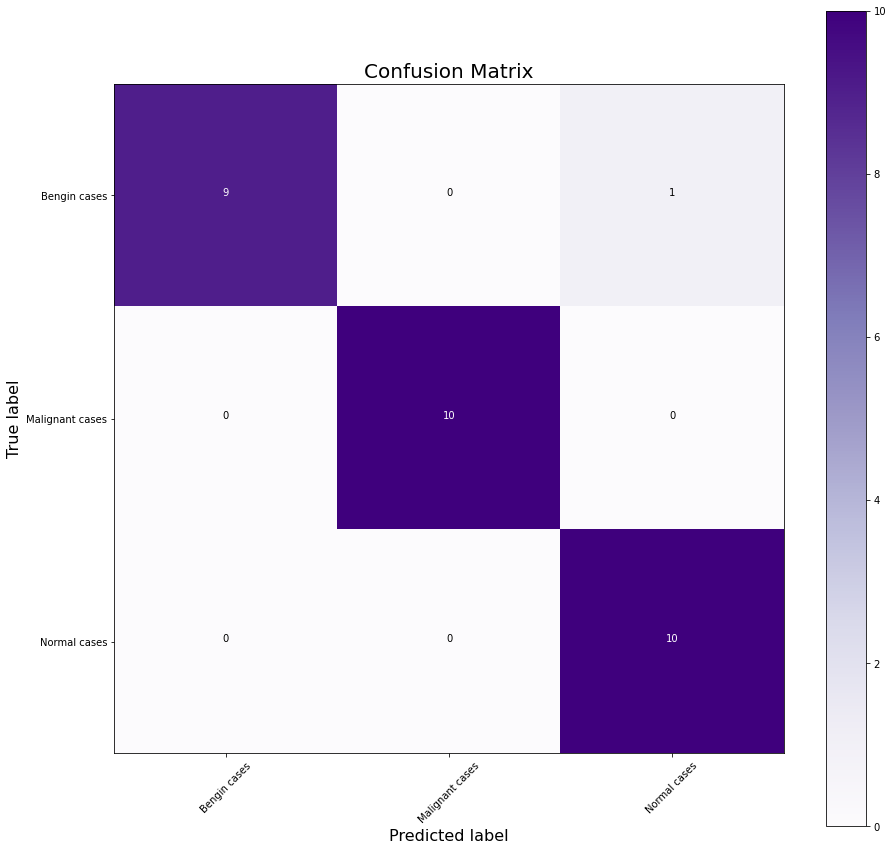

In [ ]:
y_test_pred = model.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

*****RESNET50*****


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resModel2 = ResNet50(include_top = False, input_shape = (64, 64,3), weights = 'imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resModel2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
for i, l in enumerate(resModel2.layers):
  print(i, l.name, " - ", l.trainable)

0 input_1  -  True
1 conv1_pad  -  True
2 conv1_conv  -  True
3 conv1_bn  -  True
4 conv1_relu  -  True
5 pool1_pad  -  True
6 pool1_pool  -  True
7 conv2_block1_1_conv  -  True
8 conv2_block1_1_bn  -  True
9 conv2_block1_1_relu  -  True
10 conv2_block1_2_conv  -  True
11 conv2_block1_2_bn  -  True
12 conv2_block1_2_relu  -  True
13 conv2_block1_0_conv  -  True
14 conv2_block1_3_conv  -  True
15 conv2_block1_0_bn  -  True
16 conv2_block1_3_bn  -  True
17 conv2_block1_add  -  True
18 conv2_block1_out  -  True
19 conv2_block2_1_conv  -  True
20 conv2_block2_1_bn  -  True
21 conv2_block2_1_relu  -  True
22 conv2_block2_2_conv  -  True
23 conv2_block2_2_bn  -  True
24 conv2_block2_2_relu  -  True
25 conv2_block2_3_conv  -  True
26 conv2_block2_3_bn  -  True
27 conv2_block2_add  -  True
28 conv2_block2_out  -  True
29 conv2_block3_1_conv  -  True
30 conv2_block3_1_bn  -  True
31 conv2_block3_1_relu  -  True
32 conv2_block3_2_conv  -  True
33 conv2_block3_2_bn  -  True
34 conv2_block3_2_relu

In [ ]:
model2 = tensorflow.keras.models.Sequential()
model2.add(resModel2)
model2.add(tensorflow.keras.layers.Flatten())
#model2.add(tensorflow.keras.layers.Dense(512, activation="relu"))
#model2.add(tensorflow.keras.layers.Dropout(0.5))
model2.add(tensorflow.keras.layers.Dense(128, activation="relu"))
model2.add(tensorflow.keras.layers.Dropout(0.5))
model2.add(tensorflow.keras.layers.Dense(3, activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 24,636,803
Trainable params: 24,583,683
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model2.compile(optimizer = "adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_eval, y_eval))

Epoch 1/10
26/26 [==============================] - 319s 11s/step - loss: 0.7995 - accuracy: 0.7900 - val_loss: 4464.5615 - val_accuracy: 0.4849
Epoch 2/10
26/26 [==============================] - 299s 12s/step - loss: 0.1101 - accuracy: 0.9611 - val_loss: 1268.1230 - val_accuracy: 0.4849
Epoch 3/10
26/26 [==============================] - 299s 12s/step - loss: 0.0757 - accuracy: 0.9765 - val_loss: 346.5652 - val_accuracy: 0.4849
Epoch 4/10
26/26 [==============================] - 300s 12s/step - loss: 0.2293 - accuracy: 0.9327 - val_loss: 2254.9172 - val_accuracy: 0.4849
Epoch 5/10
26/26 [==============================] - 293s 11s/step - loss: 0.0805 - accuracy: 0.9697 - val_loss: 776.0784 - val_accuracy: 0.4849
Epoch 6/10
26/26 [==============================] - 292s 11s/step - loss: 0.0220 - accuracy: 0.9938 - val_loss: 101.2813 - val_accuracy: 0.4849
Epoch 7/10
26/26 [==============================] - 290s 11s/step - loss: 0.0781 - accuracy: 0.9833 - val_loss: 228.4552 - val_accura

1/1 [==============================] - 2s 2s/step - loss: 157.0567 - accuracy: 0.3333
Test accuracy: 0.3333333432674408
Test loss: 157.0566864013672


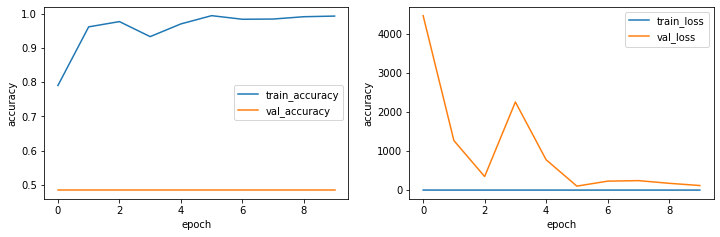

In [ ]:
results(model2,history2, X_test, y_test)

In [ ]:
model2.save('Resnet.h5')

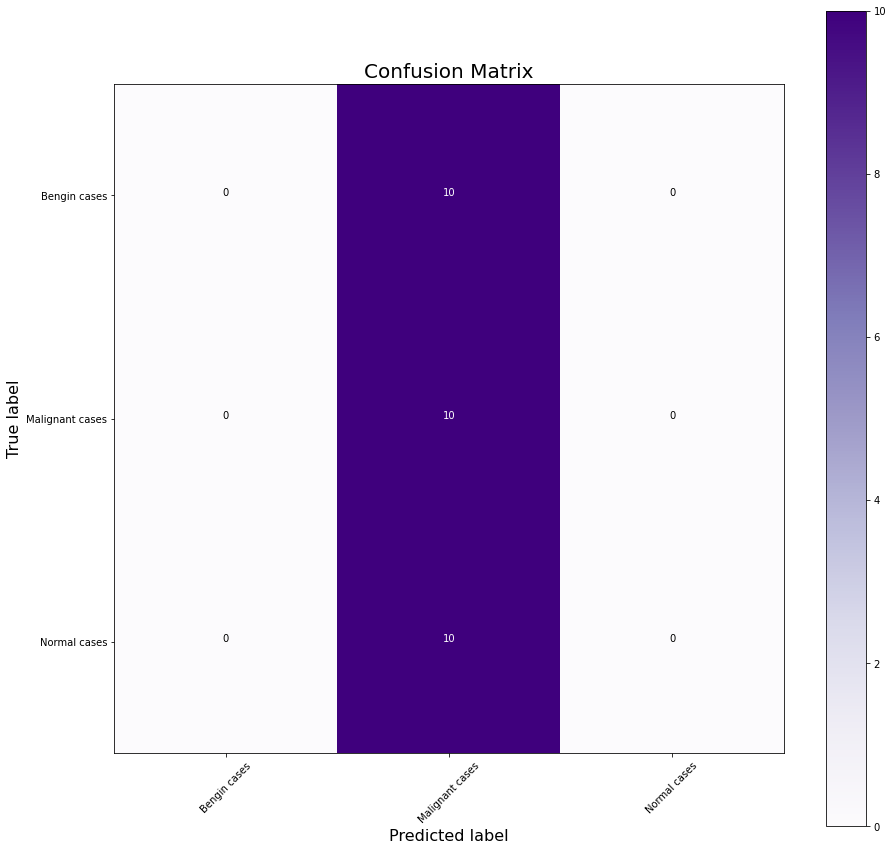

In [ ]:
y_test_pred = model2.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)